# JuliaR

### On DataFrames and R (dplyr)-like functionality in Julia

<img src="meme.jpg" alt="Drawing" style="width: 500px;"/>


---

---

---

---

---

## Package management 

### To download

```Pkg.add``` $\equiv$ ```install.packages```

In [1]:
import Pkg # load Pkg package into namespace
Pkg.add("DataFrames") # download package from github

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


    Fetching:

    Fetching: [====================>                    

    Fetching:

    Fetching: [======================================>

Fetching: [========================================>]  100.0 %

  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


#### TASK: Now you do it!

---

### To load 

Either

In [2]:
import DataFrames 

Adds functions/variables/structs from ```DataFrames``` to namesapces with ```DataFrames.``` prefix.

i.e. 

In [3]:
DataFrames.nrow

nrow (generic function with 2 methods)

calls the ```nrow``` function from ```DataFrames```;

sans prefix, ```nrow``` throws an error.

In [4]:
nrow

LoadError: [91mUndefVarError: nrow not defined[39m

or

In [5]:
using DataFrames

Adds exported functions/variables/structs from ```DataFrames``` to namespace.

i.e. ```nrow()``` calls the ```nrow()``` function from ```DataFrames```.

In [6]:
nrow

nrow (generic function with 2 methods)

reminds me of the `attatch()` function in `R` 

---

---

---

---

---

## Getting help

1) type ```?``` then the thing you want help with in the REPL

In [7]:
? + 

search: +



```
+(x, y...)
```

Addition operator. `x+y+z+...` calls this function with all arguments, i.e. `+(x, y, z, ...)`.

# Examples

```jldoctest
julia> 1 + 20 + 4
25

julia> +(1, 20, 4)
25
```

---

```
dt::Date + t::Time -> DateTime
```

The addition of a `Date` with a `Time` produces a `DateTime`. The hour, minute, second, and millisecond parts of the `Time` are used along with the year, month, and day of the `Date` to create the new `DateTime`. Non-zero microseconds or nanoseconds in the `Time` type will result in an `InexactError` being thrown.


2) Google it. 

3) Post in the slack

---

---

---

---

---

## Functions (very quickly)

Most similar to `R` is 

In [193]:
head = function(x,y)
    return first(df,4) # first is a function from DataFrames
end 

#79 (generic function with 1 method)

most similar to MATLAB

In [9]:
f1 = function(x,y) 
    x*y
end

#3 (generic function with 1 method)

For piping, anonymous functions are neat

In [10]:
f2 = x -> x^2

#5 (generic function with 1 method)

In [11]:
f2(4)

16

see also
 - broadcasting with `.` syntax (maybe the best feature there is! IMO) 
 - methods and mutliple dispatch and types

---

---

---

---

---

## Piping (function compositon)

Pass the object on the left to the function of the right. 

i.e. In R we use the `%>%` infix operator 
```
> aFun <- function(x) x^2
> b <- 2 
> b %>% aFun
[1] 4
```

In julia its `|>`

In [12]:
fun(x) = x^2
b = 2 
b |> fun |> fun 

16

with anonymous functions

In [13]:
b |> 
    x -> x^2 |> 
    x -> 2*x

8

There are some other really cool function composition and piping stuff out there too
 - $f\circ g$ notation type `?\circ\tab` into the REPL
 - or see the `Piping` package

---

---

---

---

---

## Loading data 

In [14]:
import CSV 

Either 

```CSV.read("cars.csv", DataFrame)```

or 

which is equivalent to 

In [15]:
cars = CSV.File("cars.csv") |> DataFrame 
cars |> head 

LoadError: [91mMethodError: no method matching (::var"#1#2")(::DataFrame)[39m
[91m[0mClosest candidates are:[39m
[91m[0m  #1(::Any, [91m::Any[39m) at In[8]:1[39m

There is also a ```DelimitedFiles``` package, but I've never used it. 

---

---

---

---

---

## Basic operations 

The usage of some functionality is *exactly* the same as R;

In [16]:
nrow(cars)

93

In [17]:
ncol(cars)

27

In [149]:
names(cars) # can also call propertynames() to return an array of Symbols

27-element Array{String,1}:
 "Manufacturer"
 "Model"
 "Type"
 "MinPrice"
 "Price"
 "MaxPrice"
 "AirBags"
 "DriveTrain"
 "Cylinders"
 "EngineSize"
 "Horsepower"
 "RPM"
 "RevPerMile"
 ⋮
 "Passengers"
 "Length"
 "Wheelbase"
 "Width"
 "TurnCircle"
 "RearSeatRoom"
 "LuggageRoom"
 "Weight"
 "Origin"
 "Make"
 "City"
 "Highway"

---

---

---

---

---

## Indexing ```DataFrames```

There are many options (too many?).

Either 

In [19]:
cars.Type # most similar to income$Sex in R
cars."Type" 

93-element PooledArrays.PooledArray{String,UInt32,1,Array{UInt32,1}}:
 "Small"
 "Midsize"
 "Compact"
 "Midsize"
 "Midsize"
 "Midsize"
 "Large"
 "Large"
 "Midsize"
 "Large"
 "Midsize"
 "Compact"
 "Compact"
 ⋮
 "Compact"
 "Small"
 "Small"
 "Sporty"
 "Midsize"
 "Van"
 "Small"
 "Van"
 "Compact"
 "Sporty"
 "Compact"
 "Midsize"

Or index with square brackets
```
cars[rows, columns]
```

To get all rows we use either
```
: # as in MATLAB
```
or
```
! 
```

The columns argument can be any of (all 3 return the same thing)
```
:Type      # the syntax for a Symbol type
"Type"     # string
3          # column number 
```
or as a vector (all 3 return the same thing)
```
[:Type]
["Type"]
[3]
```


#### TASK: What is the difference beetween 

In [20]:
cars[:,[:Type]]
cars[!,[:Type]];

#### what is the difference between 

In [21]:
cars[:,:Type]
cars[:,[:Type]];

#### what does this one do

In [22]:
cars.Type; # or cars."Type" same-same 

---

The following are all ways to index a `DataFrame`. 

In [23]:
## Return a VIEW as a Vector
cars.Type      ## most similar to cars$Type in R
cars."Type"
cars[!,:Type] 
cars[!,"Type"]
cars[!,3]

## Return a COPY as a Vector 
cars[:,:Type] 
cars[:,"Type"]
cars[:,3]

## return a COPY as a DataFrame
cars[:,[:Type]]
cars[:,["Type"]]
cars[:,[3]]

## return a VIEW as a DataFrame
cars[!,[:Type]] # this is my personal preference
cars[!,["Type"]]
cars[!,[3]];

can also index columns via arrays and logicals but better to use `filter` see below 

We can also pass arrays of indicies 

In [24]:
cars[!,[:Type, :Model]] |> head 

LoadError: [91mMethodError: no method matching (::var"#1#2")(::DataFrame)[39m
[91m[0mClosest candidates are:[39m
[91m[0m  #1(::Any, [91m::Any[39m) at In[8]:1[39m

or invert selection with 

In [25]:
cars[!,Not([:Type,:Model])] |> head 

LoadError: [91mMethodError: no method matching (::var"#1#2")(::DataFrame)[39m
[91m[0mClosest candidates are:[39m
[91m[0m  #1(::Any, [91m::Any[39m) at In[8]:1[39m

---

#### What is the difference between a *copy* and a *view*

In [26]:
aCopy = cars[:,[:Type]]     # select Type column as a COPY
aCopy[1,:Type] = "hello"    # change the first element
aCopy |> head               # print the copy

LoadError: [91mMethodError: no method matching (::var"#1#2")(::DataFrame)[39m
[91m[0mClosest candidates are:[39m
[91m[0m  #1(::Any, [91m::Any[39m) at In[8]:1[39m

In [27]:
cars |> head       # print original and compare 

LoadError: [91mMethodError: no method matching (::var"#1#2")(::DataFrame)[39m
[91m[0mClosest candidates are:[39m
[91m[0m  #1(::Any, [91m::Any[39m) at In[8]:1[39m

In [28]:
aView = cars[!,[:Type]]     # select the Type column as a VIEW
aView[1,:Type] = "hello"    # change the first element
aView |> head               # print the view

LoadError: [91mMethodError: no method matching (::var"#1#2")(::DataFrame)[39m
[91m[0mClosest candidates are:[39m
[91m[0m  #1(::Any, [91m::Any[39m) at In[8]:1[39m

In [29]:
cars |> head      # now it has changed 

LoadError: [91mMethodError: no method matching (::var"#1#2")(::DataFrame)[39m
[91m[0mClosest candidates are:[39m
[91m[0m  #1(::Any, [91m::Any[39m) at In[8]:1[39m

***```cars``` has how changed!!!!***

Be careful.

---

---

---

---

---

---

## A likeness with ```dplyr```

The ```DataFrames``` package has the same data manipulation functionality as ```dplyr```



``` R ``` functions and their ```julia``` equivalents;

 - In R ```rename()```$\equiv$ in julia ```rename()``` - rename columns.
 
 - In R ```filter()```$\equiv$ in julia ```filter()``` - picks cases based on their values.
 
 - In R ```select()```$\equiv$ in julia ```select()``` - picks variables based on their names.
 
 - In R ```mutate()```$\equiv$ in julia ```transform()``` - adds new variables that are functions of existing variables.

 - In R ```summarise()```$\equiv$ in julia ```combine()``` - reduces multiple values down to a single summary

 - In R ```arrange()```$\equiv$ in julia ```sort()``` - changes the ordering of the rows.
 
 - In R ```group_by()```$\equiv$in julia ```groupby()``` - returns a ```GroupedDataFrame``` object.
 

```rename!(), filter!(), select!(), transform!(), sort!()``` also exist to manipulate DataFrames in-place
 
Here, common syntax is either 
```
:ColumName => :NewName
:ColumName => function => :NewName
:ColumName => function
```

Ex's.



In [30]:
cars = CSV.File("cars.csv") |> DataFrame; # read in the data again 'cause I changed it

In [31]:
filter!(:Origin => (x -> isequal(x,"non-USA")), cars) |> head 
# for some reason this one is backwards to the others!
# also has an optional argument view::Bool to specify whether to return a view or a copy
# also, note the ! to change cars in place 
# see also filter(:Origin => (x -> isequal(x,"non-USA")), cars) |> head 

LoadError: [91mMethodError: no method matching (::var"#1#2")(::DataFrame)[39m
[91m[0mClosest candidates are:[39m
[91m[0m  #1(::Any, [91m::Any[39m) at In[8]:1[39m

In [32]:
select!(cars, [:Manufacturer, :Model, :Price, :MPGCity, :MPGHighway, :DriveTrain, :Cylinders, :EngineSize]) |> names 

8-element Array{String,1}:
 "Manufacturer"
 "Model"
 "Price"
 "MPGCity"
 "MPGHighway"
 "DriveTrain"
 "Cylinders"
 "EngineSize"

In [173]:
mpg2lper100(MPG) = 235.215./MPG
transform!(cars,:MPGCity => mpg2lper100 => :City, :MPGHighway => mpg2lper100 => :Highway) |> 
    x -> select!(x,Not([:MPGCity,:MPGHighway])) |> 
    head 

LoadError: [91mMethodError: no method matching (::var"#1#2")(::DataFrame)[39m
[91m[0mClosest candidates are:[39m
[91m[0m  #1(::Any, [91m::Any[39m) at In[8]:1[39m

In [34]:
carsByCylinders = groupby(cars, :Cylinders) 

,Manufacturer,Model,Price,DriveTrain,Cylinders,EngineSize,City,Highway
,String,String,Float64,String,String,Float64,Float64,Float64
1,Acura,Integra,15.9,Front,4,1.8,9.4086,7.58758
2,BMW,535i,30.0,Rear,4,3.5,10.6916,7.8405
3,Geo,Storm,12.5,Front,4,1.6,7.8405,6.53375
4,Honda,Prelude,19.8,Front,4,2.3,9.80063,7.58758
5,Honda,Civic,12.1,Front,4,1.5,5.60036,5.11337
6,Honda,Accord,17.5,Front,4,2.2,9.80063,7.58758
7,Hyundai,Excel,8.0,Front,4,1.5,8.11086,7.12773
8,Hyundai,Elantra,10.0,Front,4,1.8,10.6916,8.11086
9,Hyundai,Scoupe,10.0,Front,4,1.5,9.04673,6.91809


In [35]:
keys(carsByCylinders)

6-element DataFrames.GroupKeys{GroupedDataFrame{DataFrame}}:
 GroupKey: (Cylinders = "4",)
 GroupKey: (Cylinders = "6",)
 GroupKey: (Cylinders = "3",)
 GroupKey: (Cylinders = "8",)
 GroupKey: (Cylinders = "rotary",)
 GroupKey: (Cylinders = "5",)

In [36]:
carsByCylinders[(Cylinders="5",)] |> head 

LoadError: [91mMethodError: no method matching (::var"#1#2")(::SubDataFrame{DataFrame,DataFrames.Index,Array{Int64,1}})[39m
[91m[0mClosest candidates are:[39m
[91m[0m  #1(::Any, [91m::Any[39m) at In[8]:1[39m

In [37]:
carsByCylinders[6] |> head 

LoadError: [91mMethodError: no method matching (::var"#1#2")(::SubDataFrame{DataFrame,DataFrames.Index,Array{Int64,1}})[39m
[91m[0mClosest candidates are:[39m
[91m[0m  #1(::Any, [91m::Any[39m) at In[8]:1[39m

In [38]:
carsByCylDrive = groupby(income, [:Cylinders, :DriveTrain])
keys(carsByCylDrive)

LoadError: [91mUndefVarError: income not defined[39m

In [39]:
carsByCylDrive[(Cylinders = "4",DriveTrain = "4WD")] |> head 

LoadError: [91mUndefVarError: carsByCylDrive not defined[39m

In [40]:
describe(cars)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,Manufacturer,,Acura,,Volvo,0,String
2,Model,,100,,Tercel,0,String
3,Price,20.5089,8.0,19.1,61.9,0,Float64
4,DriveTrain,,4WD,,Rear,0,String
5,Cylinders,,3,,rotary,0,String
6,EngineSize,2.24222,1.0,2.2,4.5,0,Float64
7,City,10.4738,5.11337,10.6916,13.8362,0,Float64
8,Highway,8.11545,4.7043,7.8405,11.2007,0,Float64


In [41]:
mean(x) = sum(x)/length(x)
combine(carsByCylinders, :City => mean) |> x -> sort(x,:Cylinders)

,Cylinders,City_mean
,String,Float64
1,3,6.09075
2,4,9.62288
3,5,12.7985
4,6,12.7238
5,8,13.8362
6,rotary,13.8362


---

---

---

---

---

## Linear Models 

In [42]:
using GLM

┌ Info: Precompiling GLM [38e38edf-8417-5370-95a0-9cbb8c7f171a]
└ @ Base loading.jl:1278


In [43]:
cars = CSV.File("cars.csv") |> DataFrame; # read in the data again 'cause I changed it
filterFun(cyl) = !isequal(cyl,"rotary") # exclude rotary engines
filter!(:Cylinders => filterFun, cars) |> 
    x -> transform!(x,:MPGCity => mpg2lper100 => :City, :MPGHighway => mpg2lper100 => :Highway) |> 
    x -> select!(x, Not([:MPGCity,:MPGHighway])) |> 
    head 

LoadError: [91mMethodError: no method matching (::var"#1#2")(::DataFrame)[39m
[91m[0mClosest candidates are:[39m
[91m[0m  #1(::Any, [91m::Any[39m) at In[8]:1[39m

In [44]:
transform!(cars, :Cylinders => (x->parse.(Int,x)) => :Cylinders)
lm1 = lm(@formula(City ~ Cylinders + Origin), cars)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.CholeskyPivoted{Float64,Array{Float64,2}}}},Array{Float64,2}}

City ~ 1 + Cylinders + Origin

Coefficients:
─────────────────────────────────────────────────────────────────────────────
                     Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────────
(Intercept)       4.42476     0.663763   6.67    <1e-8    3.10587    5.74364
Cylinders         1.34473     0.118469  11.35    <1e-18   1.10933    1.58012
Origin: non-USA  -0.170328    0.307739  -0.55    0.5813  -0.781798   0.441142
─────────────────────────────────────────────────────────────────────────────

In [45]:
lm2 = lm(@formula(City ~ Cylinders + Origin), cars, contrasts = Dict(:Cylinders => DummyCoding()))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.CholeskyPivoted{Float64,Array{Float64,2}}}},Array{Float64,2}}

City ~ 1 + Cylinders + Origin

Coefficients:
─────────────────────────────────────────────────────────────────────────────
                     Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────────
(Intercept)       6.25218     0.785153   7.96    <1e-11   4.69135    7.81301
Cylinders: 4      3.52633     0.765058   4.61    <1e-4    2.00545    5.04722
Cylinders: 5      6.70771     1.15793    5.79    <1e-6    4.40582    9.00961
Cylinders: 6      6.65738     0.788405   8.44    <1e-12   5.09009    8.22468
Cylinders: 8      7.63451     0.908325   8.41    <1e-12   5.82882    9.4402
Origin: non-USA  -0.161429    0.283094  -0.57    0.5700  -0.724202   0.401344
─────────────────────────────────────────────────────────────────────────────

you can also get the coefficients table as a dataframe

In [128]:
lm1Coeffs = DataFrame(coeftable(lm1))

,Name,Coef.,Std. Error,t,Pr(>|t|),Lower 95%,Upper 95%
,String,Float64,Float64,Float64,Float64,Float64,Float64
1,(Intercept),4.42476,0.663763,6.66617,2.13124e-9,3.10587,5.74364
2,Cylinders,1.34473,0.118469,11.3508,5.46275e-19,1.10933,1.58012
3,Origin: non-USA,-0.170328,0.307739,-0.553483,0.581321,-0.781798,0.441142


---

In [46]:
using Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278


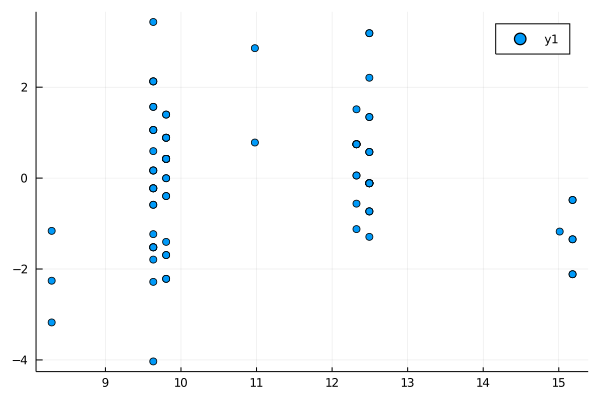

In [47]:
scatter(predict(lm1.model), residuals(lm1.model))

---

## Tasks

1) For the cars dataset;
 - select all cars which seat 5 or less people 
 - transform the MPG data to L/100km
 - return the following as a single dataframe 
     - the mean city and highway efficiency for USA and non-USA cars
     - the number of USA and non-USA cars in the dataset

2) for cars which seat 5 or less passengers, fit a linear model to determine if paying more for a car gives better milage

3) with the cars data set 
 - exclude rotary cylinder engines
 - compute the city efficiency in L/100km 
 - convert :Cylinders to a continuous predictor
 - with city efficiency in L/100km as the response variable, implement an exhastive algorithm to find the linear model which fits best with the following predictors
 
 [:Weight,
 
 :Price,
 
 :Length,
 
 :FuelTankCapacity,
 
 :Wheelbase,
 
 :RPM,
 
 :Horsepower, 
 
 :EngineSize, 
 
 :Cylinders, 
 
 :City, 
 
 :Passengers]

Tips: 
 - the function `parse.(Int,"1")` converts the string `"1"` to an `Int` 
 - the function `deviance(aLinerModel)` extracts the deviance for the linear model `aLinearModel`
 - the `IterTools` package has a `subsets` function which enumeartes all subsets of a vector
 - I found it easier to specify the model matrix rather than pass an `@formula` object to `lm`

In [441]:
Pkg.add("IterTools")
using IterTools
vars = propertynames(cars[!,Not(:City)])
varsPowerSet = collect(subsets(vars))[1:end-1]

  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


1023-element Array{Array{Symbol,1},1}:
 []
 [:Weight]
 [:Price]
 [:Weight, :Price]
 [:Length]
 [:Weight, :Length]
 [:Price, :Length]
 [:Weight, :Price, :Length]
 [:FuelTankCapacity]
 [:Weight, :FuelTankCapacity]
 [:Price, :FuelTankCapacity]
 [:Weight, :Price, :FuelTankCapacity]
 [:Length, :FuelTankCapacity]
 ⋮
 [:Weight, :Price, :Wheelbase, :RPM, :Horsepower, :EngineSize, :Cylinders, :Passengers]
 [:Length, :Wheelbase, :RPM, :Horsepower, :EngineSize, :Cylinders, :Passengers]
 [:Weight, :Length, :Wheelbase, :RPM, :Horsepower, :EngineSize, :Cylinders, :Passengers]
 [:Price, :Length, :Wheelbase, :RPM, :Horsepower, :EngineSize, :Cylinders, :Passengers]
 [:Weight, :Price, :Length, :Wheelbase, :RPM, :Horsepower, :EngineSize, :Cylinders, :Passengers]
 [:FuelTankCapacity, :Wheelbase, :RPM, :Horsepower, :EngineSize, :Cylinders, :Passengers]
 [:Weight, :FuelTankCapacity, :Wheelbase, :RPM, :Horsepower, :EngineSize, :Cylinders, :Passengers]
 [:Price, :FuelTankCapacity, :Wheelbase, :RPM, :Horsepowe

In [436]:
cars = CSV.File("cars.csv") |> DataFrame
filterFun(cyl) = !isequal(cyl,"rotary") # exclude rotary engines
filter!(:Cylinders => filterFun, cars) |> 
    x -> transform!(x,:MPGCity => mpg2lper100 => :City) |> 
    x -> select!(x, Not(:MPGCity)) 
transform!(cars, :Cylinders => (x->parse.(Int,x)) => :Cylinders) |> x -> first(x,5) 

,Manufacturer,Model,Type,MinPrice,Price,MaxPrice,MPGHighway,AirBags
,String,String,String,Float64,Float64,Float64,Int64,String
1,Acura,Integra,Small,12.9,15.9,18.8,31,None
2,Acura,Legend,Midsize,29.2,33.9,38.7,25,Driver & Passenger
3,Audi,90,Compact,25.9,29.1,32.3,26,Driver only
4,Audi,100,Midsize,30.8,37.7,44.6,26,Driver & Passenger
5,BMW,535i,Midsize,23.7,30.0,36.2,30,Driver only


In [437]:
select!(cars,[:Weight,:Price,:Length,:FuelTankCapacity,
        :Wheelbase,:RPM,:Horsepower, :EngineSize, :Cylinders, :City, :Passengers]);

In [438]:
deviance(lm(Matrix(cars[:,Not([:City])]),cars[:,:City]))

65.61527965353012

In [439]:
Pkg.add("IterTools")
using IterTools
vars = propertynames(cars[!,Not(:City)])
varsPowerSet = collect(subsets(vars))[1:end-1];

  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [483]:
AICs = []
bestAIC = -Inf
n = nrow(cars)
modelSize = []
bestExclusionVars = []
for (index,varsSubset) in enumerate(varsPowerSet)
    excludeVars = [:City; varsSubset]
    k = ncol(cars) - length(excludeVars)
    lmDeviance = lm(Matrix(cars[:,Not(excludeVars)]),cars[:,:City]) |> deviance 
    AIC = 2*k + n*log(lmDeviance)
    push!(modelSize,k)
    push!(AICs,AIC)
end

In [485]:
aicWidx = DataFrame( AIC = AICs, size = modelSize, which = 1:length(AICs))

sort!(aicWidx, [:AIC, :size], rev=false) |> x -> first(x,10) 

,AIC,size,which
,Any,Any,Int64
1,393.138,3,759
2,394.225,4,247
3,394.557,4,695
4,394.999,4,631
5,395.094,4,755
6,395.11,4,757
7,395.122,4,727
8,395.129,4,743
9,395.733,5,245


In [490]:
[varsPowerSet[759];:City]

8-element Array{Symbol,1}:
 :Price
 :Length
 :Wheelbase
 :RPM
 :Horsepower
 :EngineSize
 :Passengers
 :City

In [491]:
bestModel = propertynames(cars[:,Not([varsPowerSet[759];:City])])
deviance(lm(Matrix(cars[:,bestModel]),cars[:,:City]))

67.22341662966366

In [494]:
bestModel

3-element Array{Symbol,1}:
 :Weight
 :FuelTankCapacity
 :Cylinders

In [496]:
lm(@formula(City ~ Weight + Cylinders + FuelTankCapacity),cars)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.CholeskyPivoted{Float64,Array{Float64,2}}}},Array{Float64,2}}

City ~ 1 + Weight + Cylinders + FuelTankCapacity

Coefficients:
───────────────────────────────────────────────────────────────────────────────────
                       Coef.   Std. Error     t  Pr(>|t|)     Lower 95%   Upper 95%
───────────────────────────────────────────────────────────────────────────────────
(Intercept)       0.215911    0.492209     0.44    0.6620  -0.762251     1.19407
Weight            0.00181091  0.000421543  4.30    <1e-4    0.000973182  0.00264864
Cylinders         0.326235    0.115657     2.82    0.0059   0.0963907    0.55608
FuelTankCapacity  0.217604    0.0650716    3.34    0.0012   0.0882881    0.34692
───────────────────────────────────────────────────────────────────────────────────